## <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 11</span>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [ ]:

#moduli per NNs

import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

### Esercizio 11.1

Nel primo esercizio creiamo una rete neurale che ha lo scopo di fittare dei dati presi in ingresso. Nel nostro caso la rete riceve coppie di dati $(x,y)$ legati tramite una funzione lineare del tipo $f(x)=mx+b$ dove $m=2$ e $b=1$.
Per prima cosa è necessario creare i dati che la rete dovrà utilizzare per la fase di training e di test, generiamo dunque un numero sufficiente di coppie di training $(x_{train}, y_{train})$ e di validazione $(x_{valid}, y_{valid})$ ricordandoci che il $90\%$ dei dati totali deve essere utilizzato per il training e il restante $10\%$ per la validazione del modello.
Estraiamo in maniera casuale nell'intervallo $[-1,1]$ un certo numero di $x_{train}$ e di $x_{valid}$, ricaviamo poi di conseguenza le $y_{train}$ e le $y_{valid}$ estraendole da una distribuzione gaussiana rispettivamente centrate in $\mu_t=m \cdot x_{train} + b$ e $\mu_v=m \cdot x_{valid} + b$ e con varianza $\sigma$. Ricaviamo poi i dati target con cui la rete confronterà l'output ottenuto con i parametri ottimizzati come: $y_{target}=m \cdot x_{valid} + b$.

Vista la semplicità del problema è conveniente utilizzare una rete neurale che abbia una struttura che corrisponde ad un percettrone ovvero ad una rete neurale formata da un solo neurone che ha una funzione di attivazione di tipo lineare che attribuisce all'output il prodotto tra i dati di input e i rispettivi pesi, a cui aggiunge il valore del bias. Pesi e bias in questo caso corrispondono rispettivamente al coefficiente angolare e al termine noto della funzione $f(x)$. Per completare la struttura della rete è necessario selezionare poi il tipo di **ottimizzatore**, la **funzione di loss** e la **metrica** che la rete deve utilizzare. 

L'ottimizzatore rappresenta l'algoritmo che ottimizza i pesi dei layer della rete durante la fase di training, il più utilizzato è lo stochastic gradient descent che ha lo scopo di minimizzare la funzione di perdita muovendo il sistema nella direzione opposta a quella di crescita del gradiente.
La funzione di loss o funzione di perdita misura lo scarto tra i valori target del modello e i valori di output ottenuti tramite i parametri da ottimizzare, le più utilizzate sono l'errore quadratico medio o l'errore medio assoluto. 
La metrica rappresenta una misura della performance del modello ed è possibile utilizzare qualsiasi funzione di loss come metrica. 

Per prendere confidenza con l'uso delle reti neurali analizziamo come i risultati della regressione lineare dipendono dai parameri della rete, quindi dal numero di epoche $N_{epoch}$, dal numero di dati di training $N_{train}$ e validazione $N_{valid}$ e dal rumore $\sigma$ dei dati stessi. 

Consideriamo cinque tipi di modelli diversi in cui facciamo variare i parametri della rete e analizziamo i risultati ottenuti.
- **Modello 1**: $N_{epoch}=50$, $\sigma=0.0$, $N_{train}=150$, $N_{valid}=15$;
- **Modello 2**: $N_{epoch}=50$, $\sigma=0.3$, $N_{train}=150$, $N_{valid}=15$;
- **Modello 3**: $N_{epoch}=250$, $\sigma=0.0$, $N_{train}=150$, $N_{valid}=15$;
- **Modello 4**: $N_{epoch}=50$, $\sigma=0.0$, $N_{train}=500$, $N_{valid}=50$;
- **Modello 5**: $N_{epoch}=250$, $\sigma=0.3$, $N_{train}=500$, $N_{valid}=50$.


In [303]:
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [304]:
### Model 1

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 150)
x_valid = np.random.uniform(-1, 1, 15)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [305]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0) #verbose=0 non stampa di volta in volta le epoche

In [306]:
# evaluate model
score_v = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

In [307]:
# evaluate model with the exact curve
score_vt = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

Nel primo caso consideriamo un insieme ridotto di dati senza rumore e un numero di epoche pari a 50. Nei modelli successivi aumentiamo un parametro alla volta per vedere come cambiano le prestazioni della rete, fino ad arrivare all'ultimo modello che rappresenta la generalizzazione dei casi precedenti. 

In [308]:
### Model 2

sigma = 0.3 # noise standard deviation
y1_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y1_valid = np.random.normal(m * x_valid + b, sigma)

In [309]:
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history1 = model1.fit(x=x_train, y=y1_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y1_valid), verbose=0) #verbose=0 non stampa di volta in volta le epoche

Riportiamo di seguito i grafici che rappresentano i dati generati per la validazione del modello e la funzione target che rappresenta i modelli. 

In [310]:
# evaluate model
score1_v = model1.evaluate(x_valid, y1_valid, batch_size=32, verbose=0)

In [311]:
# evaluate model with the exact curve
score1_vt = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)

In [312]:
### Model 3

sigma = 0.0 # noise standard deviation
y2_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y2_valid = np.random.normal(m * x_valid + b, sigma)

In [313]:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history2 = model2.fit(x=x_train, y=y2_train, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y2_valid), verbose=0) #verbose=0 non stampa di volta in volta le epoche

In [314]:
# evaluate model
score2_v = model2.evaluate(x_valid, y2_valid, batch_size=32, verbose=0)

In [315]:
# evaluate model with the exact curve
score2_vt = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)

In [316]:
### Model 4

np.random.seed(0)
x3_train = np.random.uniform(-1, 1, 500)
x3_valid = np.random.uniform(-1, 1, 50)
x3_valid.sort()
y3_target = m * x3_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation
y3_train = np.random.normal(m * x3_train + b, sigma) # actual measures from which we want to guess regression parameters
y3_valid = np.random.normal(m * x3_valid + b, sigma)

In [317]:
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history3 = model3.fit(x=x3_train, y=y3_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x3_valid, y3_valid), verbose=0) #verbose=0 non stampa di volta in volta le epoche

In [318]:
# evaluate model
score3_v = model3.evaluate(x3_valid, y3_valid, batch_size=32, verbose=0)

In [319]:
# evaluate model with the exact curve
score3_vt = model3.evaluate(x3_valid, y3_target, batch_size=32, verbose=0)

In [320]:
### Model 5

sigma = 0.3 # noise standard deviation
y4_train = np.random.normal(m * x3_train + b, sigma) # actual measures from which we want to guess regression parameters
y4_valid = np.random.normal(m * x3_valid + b, sigma)

In [321]:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history4 = model4.fit(x=x3_train, y=y4_train, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x3_valid, y4_valid), verbose=0) #verbose=0 non stampa di volta in volta le epoche

In [322]:
# evaluate model
score4_v = model4.evaluate(x3_valid, y4_valid, batch_size=32, verbose=0)

In [323]:
# evaluate model with the exact curve
score4_vt = model4.evaluate(x3_valid, y3_target, batch_size=32, verbose=0)

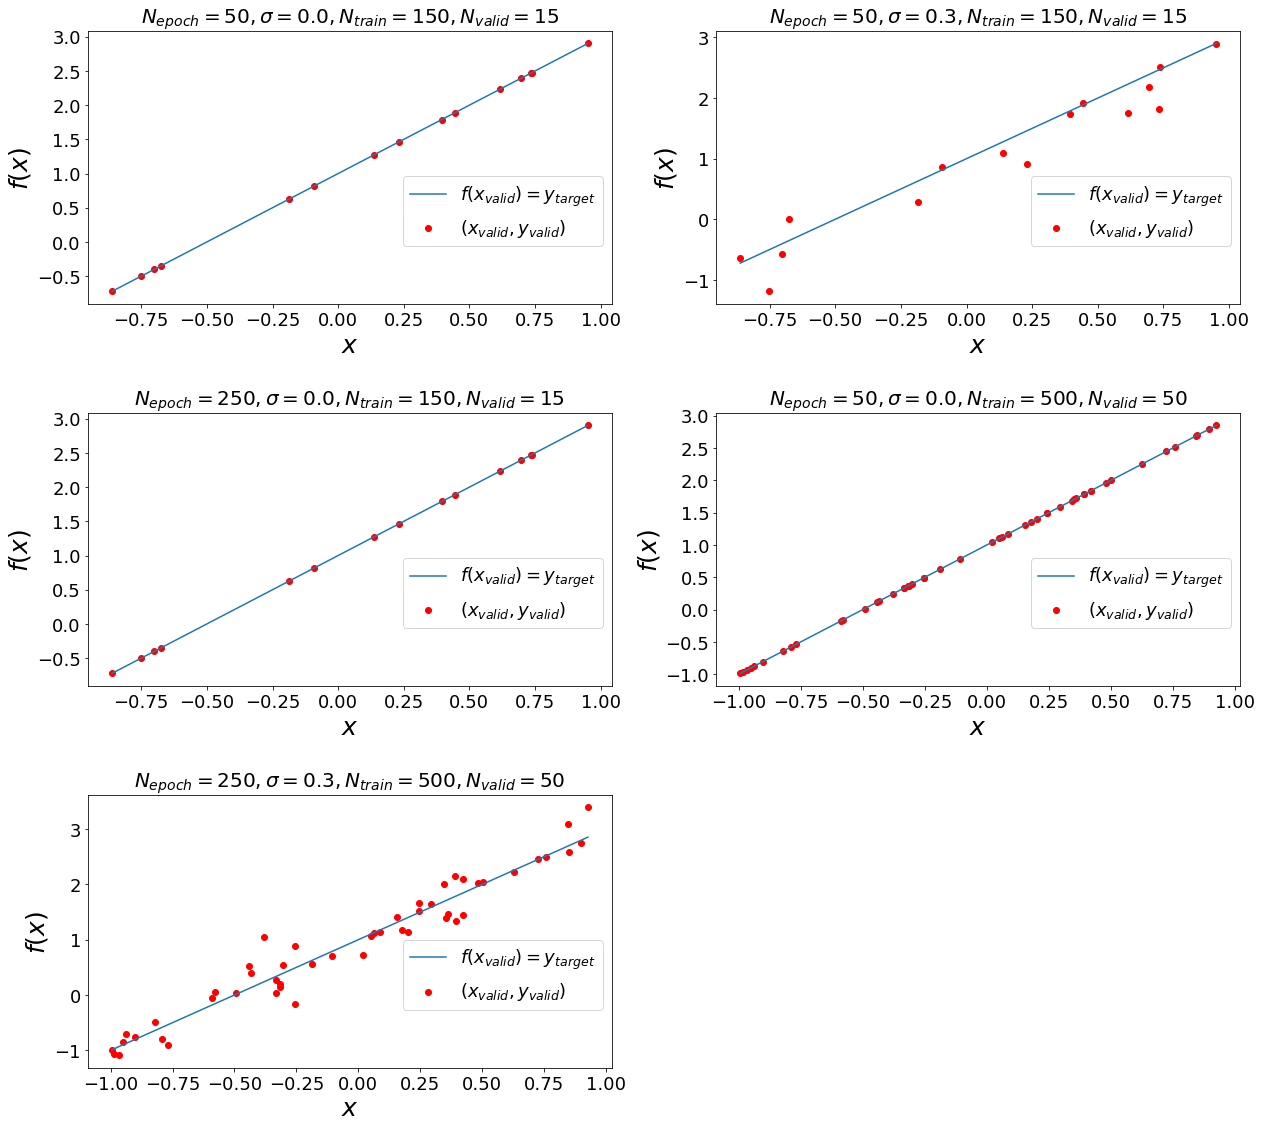

In [324]:
# plot training and target dataset

plt.figure(figsize=(20,18))

plt.subplot(3,2,1)

#plt.figure(figsize=(8,6))
plt.plot(x_valid, y_target, label='$f(x_{valid})=y_{target}$')
plt.scatter(x_valid, y_valid, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,2)

plt.plot(x_valid, y_target, label='$f(x_{valid})=y_{target}$')
plt.scatter(x_valid, y1_valid, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.3 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,3)

plt.plot(x_valid, y_target, label='$f(x_{valid})=y_{target}$')
plt.scatter(x_valid, y2_valid, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,4)

plt.plot(x3_valid, y3_target, label='$f(x_{valid})=y_{target}$')
plt.scatter(x3_valid, y3_valid, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,5)

plt.plot(x3_valid, y3_target, label='$f(x_{valid})=y_{target}$')
plt.scatter(x3_valid, y4_valid, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.3 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)


plt.show()

Dopo aver creato i dati su cui allenare la rete e validare il modello riportiamo di seguito l'andamento della funzione di loss sia per i dati di training e di validazione. Vediamo che in tutti i casi le funzioni di loss per i dati di training seguono l'andamento delle funzioni di loss per i dati di validazione del modello.

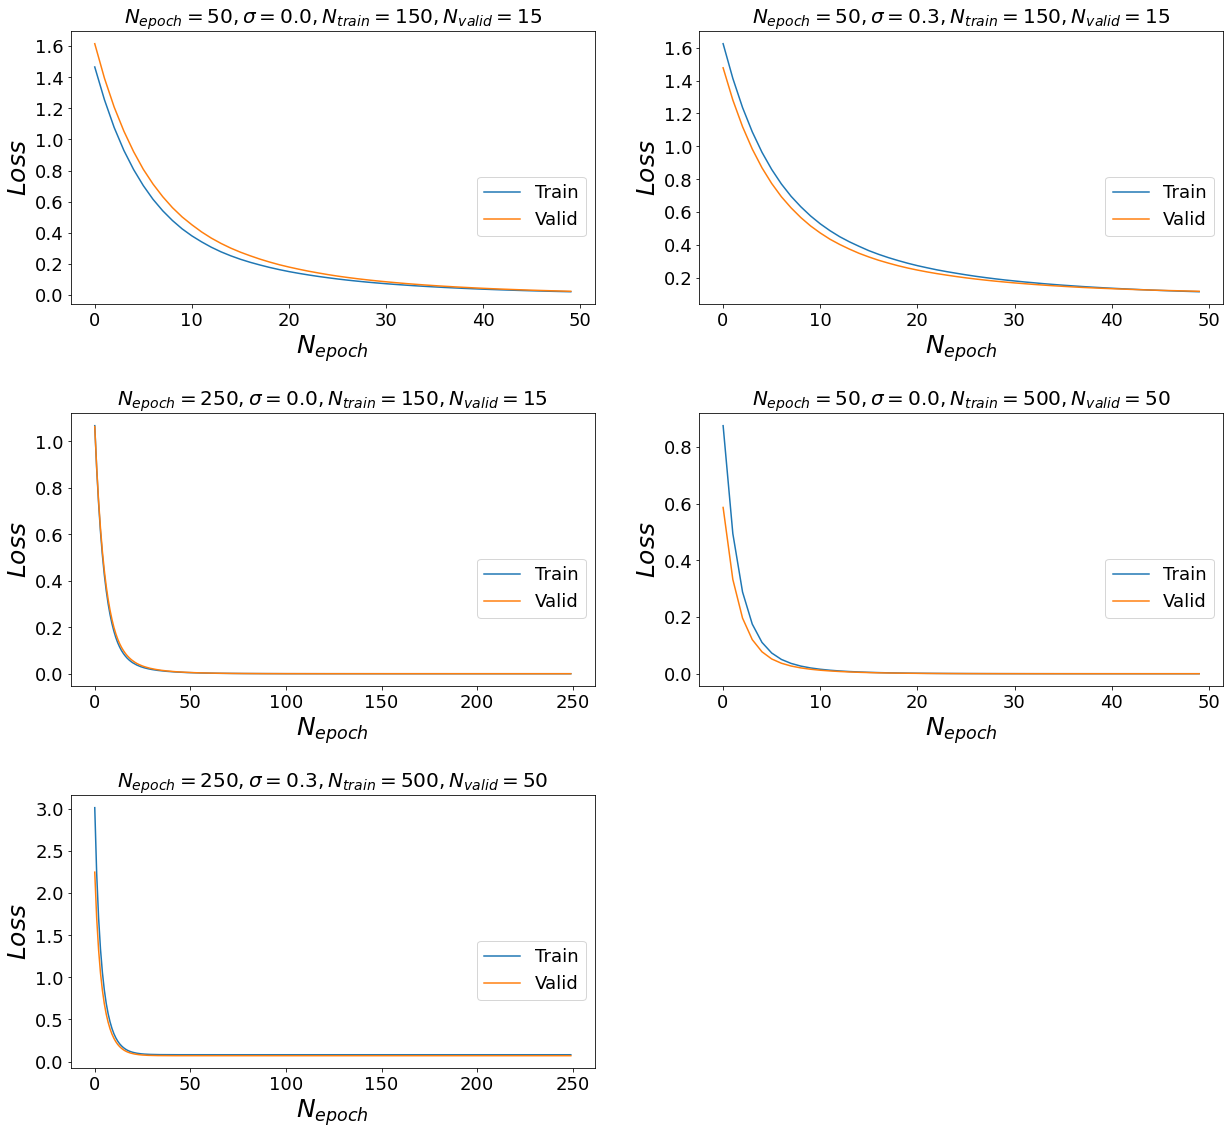

In [325]:
# plot training and target dataset

plt.figure(figsize=(20,18))

plt.subplot(3,2,1)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.ylabel('$Loss$', fontsize=25)
plt.xlabel('$N_{epoch}$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,2)

plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Valid')
plt.ylabel('$Loss$', fontsize=25)
plt.xlabel('$N_{epoch}$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.3 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,3)

plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Valid')
plt.ylabel('$Loss$', fontsize=25)
plt.xlabel('$N_{epoch}$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,4)

plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Valid')
plt.ylabel('$Loss$', fontsize=25)
plt.xlabel('$N_{epoch}$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,5)

plt.plot(history4.history['loss'], label='Train')
plt.plot(history4.history['val_loss'], label='Valid')
plt.ylabel('$Loss$', fontsize=25)
plt.xlabel('$N_{epoch}$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.3 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)


plt.show()

Di seguito riportiamo i grafici che rappresentano il confronto tra il risultato target e la predizione ottenuta dal modello.

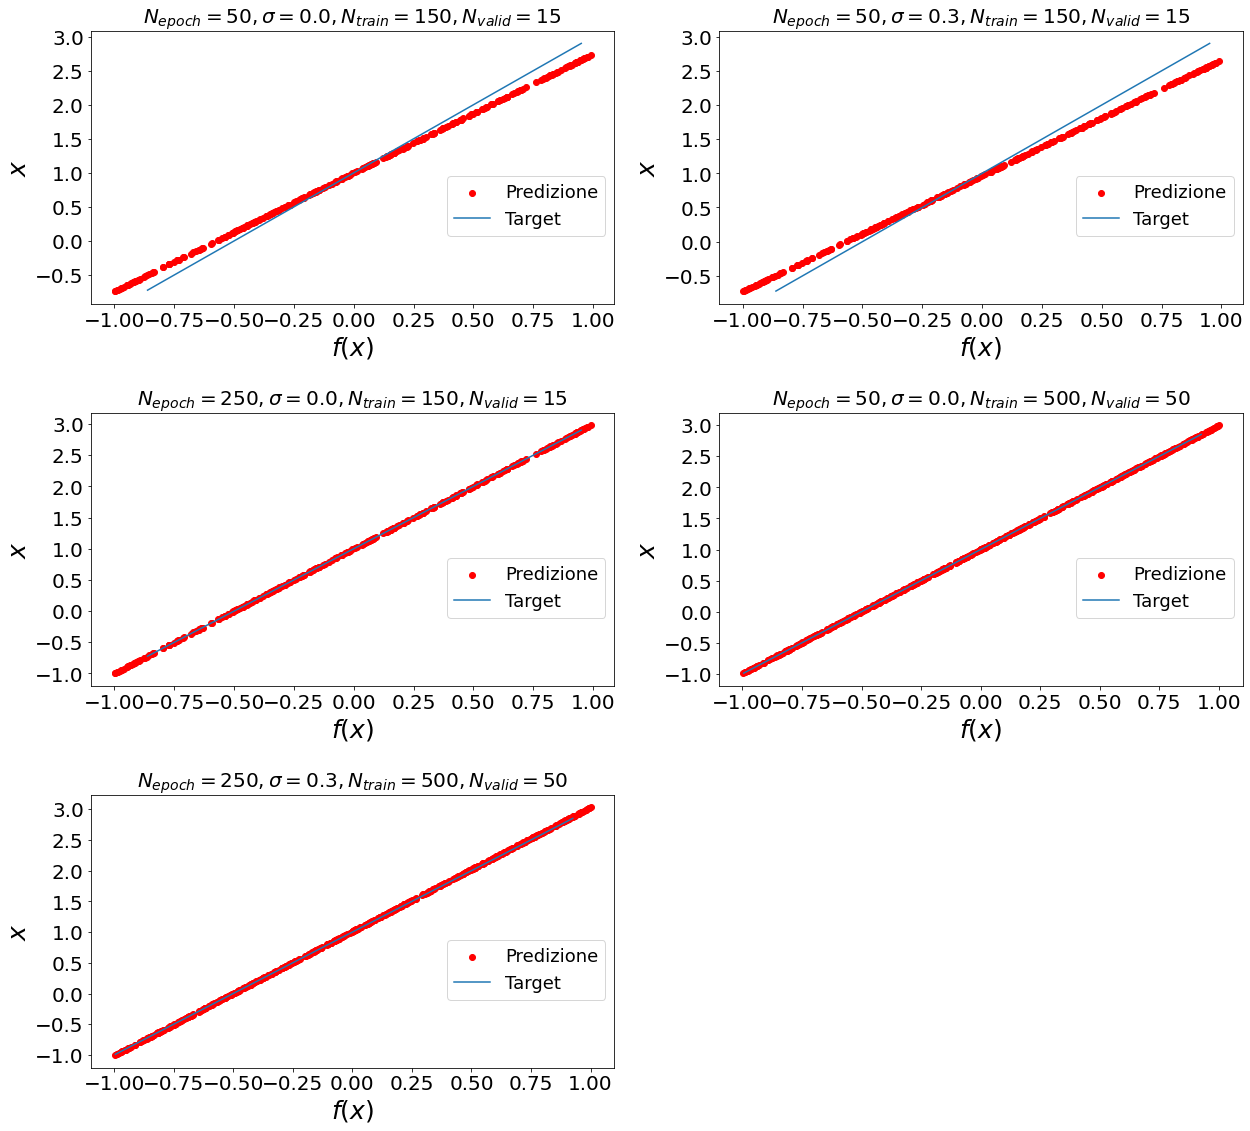

In [326]:
# plot training and target dataset

plt.figure(figsize=(20,18))

x_predicted = np.random.uniform(-1, 1, 300)

plt.subplot(3,2,1)

y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizione')
plt.plot(x_valid, y_target, label='Target')
plt.ylabel('$x$', fontsize=25)
plt.xlabel('$f(x)$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,2)

y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizione')
plt.plot(x_valid, y_target, label='Target')
plt.ylabel('$x$', fontsize=25)
plt.xlabel('$f(x)$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.3 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,3)

y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizione')
plt.plot(x_valid, y_target, label='Target')
plt.ylabel('$x$', fontsize=25)
plt.xlabel('$f(x)$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.0 , N_{train}=150 , N_{valid}=15 $', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)


x_predicted = np.random.uniform(-1, 1, 500)

plt.subplot(3,2,4)

y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizione')
plt.plot(x3_valid, y3_target, label='Target')
plt.ylabel('$x$', fontsize=25)
plt.xlabel('$f(x)$', fontsize=25)
plt.title('$N_{epoch}=50, \sigma=0.0 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplot(3,2,5)

y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='Predizione')
plt.plot(x3_valid, y3_target, label='Target')
plt.ylabel('$x$', fontsize=25)
plt.xlabel('$f(x)$', fontsize=25)
plt.title('$N_{epoch}=250, \sigma=0.3 , N_{train}=500 , N_{valid}=50 $', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5) ,fontsize=18)

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()

Riassumiamo in tabella i valori delle funzioni di loss e dell'accuratezza dei modelli sia per i dati di validazione che per i modelli applicati ai dati target.

In [327]:
models = [ "Mod.1", "Mod.2",  "Mod.3", "Mod.4",  "Mod.5"]
items = ["Loss V","Accuracy V", "Loss VT","Accuracy VT"]
data = np.array([[score_v[0] ,score1_v[0], score2_v[0] ,score3_v[0], score4_v[0]],
                [score_v[1] ,score1_v[1], score2_v[1] ,score3_v[1], score4_v[1]],
                [score_vt[0] ,score1_vt[0], score2_vt[0] ,score3_vt[0], score4_vt[0]],
                [score_vt[1] ,score1_vt[1], score2_vt[1] ,score3_vt[1], score4_vt[1]]])

df = pd.DataFrame(data, items, models)
#df.style.set_caption("Hello World")
display(df)

,Mod.1,Mod.2,Mod.3,Mod.4,Mod.5
Loss V,0.02441,0.116532,1.860561e-08,0.000002,0.070596
Accuracy V,0.02441,0.116532,1.860561e-08,0.000002,0.070596
Loss VT,0.02441,0.038625,1.860561e-08,0.000002,0.000213
Accuracy VT,0.02441,0.038625,1.860561e-08,0.000002,0.000213


Vediamo che i valori minori per la loss e l'accuratezza si ottengono per il terzo modello in cui i dati non hanno rumore e le epoche sono state significativamente aumentate rispetto ai primi due modelli.

Analizziamo poi i parametri ottimali ottenuti dai vari modelli. Conoscendo i valori del coefficiente angolare $m=2$ e dell'intercetta $b=1$ e conforntandoli con i risultati ottenuti dai vari modelli considerati vediamo che i modelli che meglio approssimano questi valori sono gli ultimi tre. Nel terzo modello abbiamo dati senza rumore e un numero di epoche pari a $N_{epoch}=250$, quindi molto maggiore rispetto alle $50$ dei due modelli iniziali, nel quarto modello abbiamo dati senza rumore ma abbiamo aumentato il numero dei dati stessi da $150$ a $500$ per i dati di training e da $15$ a $50$ per i dati di validazione. Nell'ultimo modello che sembra approssimare meglio di tutti i parametri cercati abbiamo un numero di epoche pari a $250$, un dataset iniziale pari a quello del quarto modello e un rumore $\sigma =0.3$ associato ai dati. 

In [328]:
models = [ "Target", "Mod.1", "Mod.2",  "Mod.3", "Mod.4",  "Mod.5"]
items = ["m","b"]
data = np.array([[m, model.get_weights()[0], model1.get_weights()[0], model2.get_weights()[0] ,model3.get_weights()[0], model4.get_weights()[0]],
                [b, model.get_weights()[1], model1.get_weights()[1], model2.get_weights()[1] ,model3.get_weights()[1], model4.get_weights()[1]]])

df = pd.DataFrame(data, items, models)
#df.style.set_caption("Hello World")
display(df)

/Users/martina/opt/anaconda3/envs/New_environment/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


,Target,Mod.1,Mod.2,Mod.3,Mod.4,Mod.5
m,2,[[1.743321]],[[1.693378]],[[1.9997745]],[[1.997243]],[[2.0206501]]
b,1,[1.0009873],[0.96429783],[1.0000063],[0.9999671],[1.0099353]


Da questi risultati possiamo dire che aumentando il quantitativo di dati di training e di validazione e aumentando il numero di epoche della rete le capacità predittive della rete migliorano in modo significativo. 

### Esercizio 11.2

Cerchiamo ora di fittare un polinomio di terzo grado
$$f(x)=4-3x-2x^2+3x^3 $$ con $x \in [-1,1]$
utilizzando una nuova rete neurale. 


Analizziamo i risultati ottenuti facendo variare i seguenti parametri della rete:

- numero layers
- numero di neuroni in ogni layer
- funzione di attivazione
- ottimizzatore
- funzione di loss

Per prima cosa generiamo $1500$ punti di training e $150$ punti di validazione nell'intervallo $[-1, 1]$, per questo esercizio scegliamo di utilizzare dei dati senza rumore. Generiamo poi altri dati di validazione che giacciono al di fuori dell'intervallo su cui si è allenato il modello, così da poter verificare le capacità predittive della rete su dati non analizzati in precedenza.

In [3]:
# parametri f(x) = a*x^3 + b*x^2 + c*x + d
a = 3 #termine di terzo grado
b = -2 #termine di secondo grado
c = -3 #termine di primo grado
d = 4 #termine noto

In [4]:
# generate training inputs
np.random.seed(0)
x_train1 = np.random.uniform(-1, 1, 1500)
x_valid1 = np.random.uniform(-1, 1, 150)
x_valid1.sort() #ordino gli elementi del set di validazione
y_target1 = a * pow(x_valid1,3) + b * pow(x_valid1,2) + c * x_valid1 + d

sigma1 = 0.0 # noise standard deviation

# actual measures from which we want to guess regression parameters:
y_train1 = np.random.normal(a * pow(x_train1,3) + b * pow(x_train1,2) + c * x_train1 + d, sigma1) 
y_valid1 = np.random.normal(a * pow(x_valid1,3) + b * pow(x_valid1,2) + c * x_valid1 + d, sigma1)

In [5]:
#punti out of range 
np.random.seed(0)
x_valid1_ofr = np.random.uniform(-2, 2, 150)
x_valid1_ofr.sort() #ordino gli elementi del set di validazione
y_target1_ofr = a * pow(x_valid1_ofr,3) + b * pow(x_valid1_ofr,2) + c * x_valid1_ofr + d
y_valid1_ofr = np.random.normal(a * pow(x_valid1_ofr,3) + b * pow(x_valid1_ofr,2) + c * x_valid1_ofr + d, sigma1)

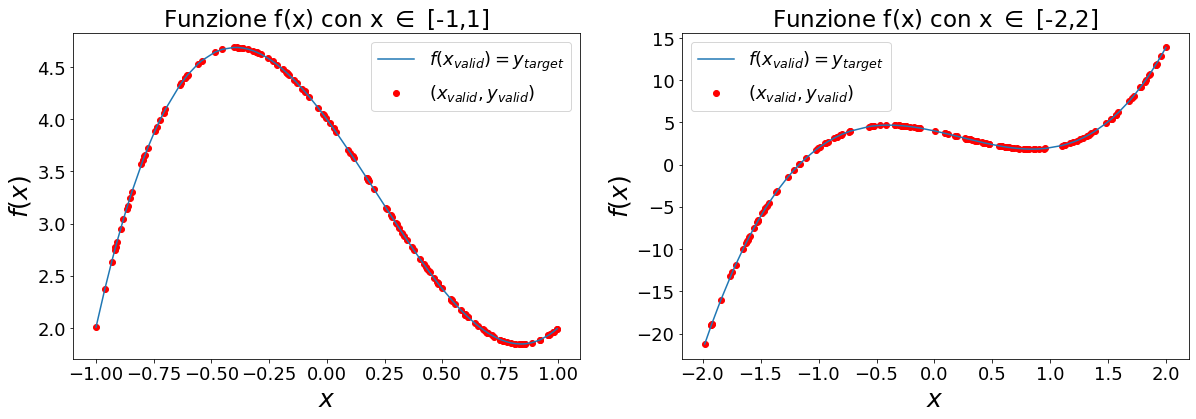

In [9]:
# plot training and target dataset
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

plt.title('Funzione f(x) con x $\in$ [-1,1]', fontsize=23)
plt.plot(x_valid1, y_target1, label='$f(x_{valid})=y_{target}$')
plt.scatter(x_valid1, y_valid1, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
#plt.title('$$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)

plt.subplot(1,2,2)
plt.title('Funzione f(x) con x $\in$ [-2,2]', fontsize=23)
plt.plot(x_valid1_ofr, y_target1_ofr, label='$f(x_{valid})=y_{target}$')
plt.scatter(x_valid1_ofr, y_valid1_ofr, color='r', label='$(x_{valid}, y_{valid})$')
plt.ylabel('$f(x)$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
#plt.title('$$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=18)


plt.show()

I parametri fissi scelti per ogni rete sono:
- Punti di training: $1500$
- Punti di validazione: $150$
- Epoche: $250$ 

Una volta generati i dati su cui far allenare la rete, costruiamo una serie di modelli variando il numero di layer che compone la rete e il numero di neuroni in ogni layer. Una volta stabilito per ogni modello quale forma della rete si presta meglio per fittare il polinomio variamo per questa rete la funzione di attivazione, l'ottimizzatore e la funzione di loss per individuare con quali caratteristiche la rete presenta le prestazioni migliori. Infine una volta individuata una rete ideale, applichiamo il rispettivo modello sui dati di validazione che sono al di fuori dell'intervallo di training per verificare il potere predittivo della rete.  

L'analisi iniziale per ogni modello verrà fatta con le seguenti caratteristiche:
- Funzione di attivazione: relu
- Ottimizzatore: stochastic gradient descent
- Funzione di loss: mean square error

Una volta selezionato il modello migliore modificheremo di volta in volta una sola di queste funzioni così da vedere come cambiano le prestazioni della rete.

#### Reti con due layer

Consideriamo una rete formata da due layer con tre possibili strutture per la rete stessa:
- **Mod. 1**: primo layer formato da due neuroni, secondo layer formato da un neurone;
- **Mod. 2**: primo layer formato da quattro neuroni, secondo layer formato da un neurone;
- **Mod. 3**: primo layer formato da otto neuroni, secondo layer formato da un neurone.

Analizziamo nei tre casi come si comporta la rete.

In [501]:
# compose the NN model
model1 = tf.keras.Sequential()
model1.add(Dense(2, input_shape=(1,), activation="relu"))
model1.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [502]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1 = model1.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [503]:
score1v = model1.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1t = model1.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [506]:
# compose the NN model
model1_a = tf.keras.Sequential()
model1_a.add(Dense(4, input_shape=(1,), activation="relu"))
model1_a.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_a.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [507]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1_a = model1_a.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [508]:
score1av = model1_a.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1at = model1_a.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [516]:
# compose the NN model
model1_b = tf.keras.Sequential()
model1_b.add(Dense(8, input_shape=(1,), activation="relu"))
model1_b.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [517]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1_b = model1_b.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [518]:
score1bv = model1_b.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt = model1_b.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

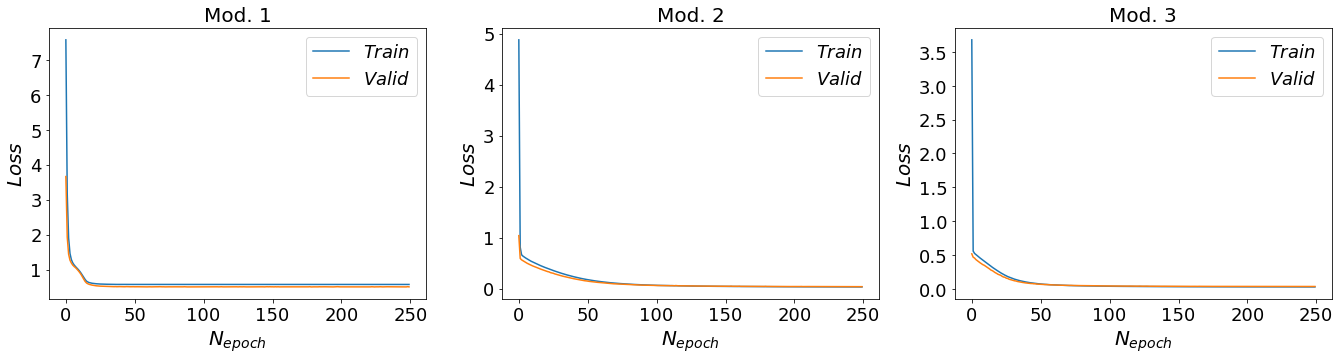

In [605]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 1", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,2)

plt.plot(history1_a.history['loss'])
plt.plot(history1_a.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 2", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,3)

plt.plot(history1_b.history['loss'])
plt.plot(history1_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 3", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)
plt.show()

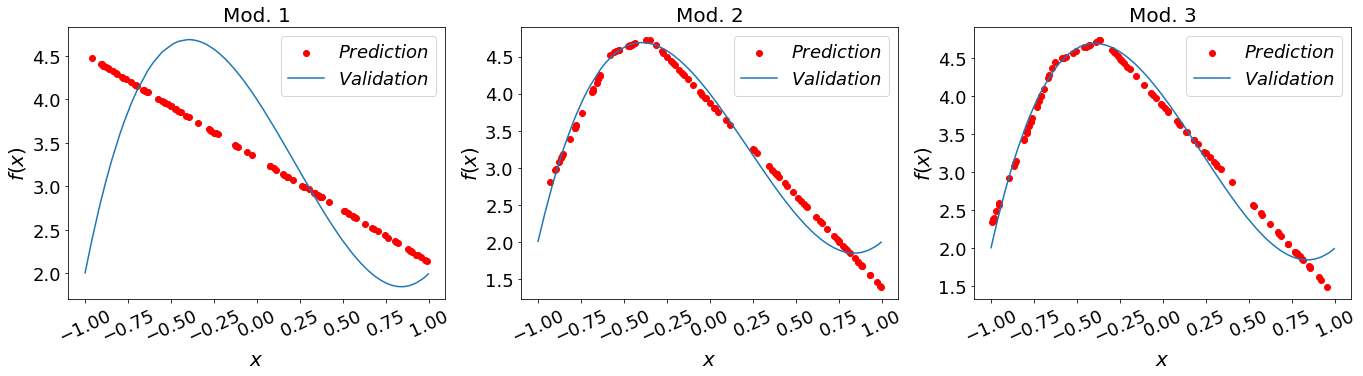

In [604]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 1", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model1_a.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 2", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model1_b.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 3", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [521]:
models = [ "Mod. 1", "Mod.2", "Mod.3"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score1v[0], score1av[0], score1bv[0]],
                 [score1v[1], score1av[1], score1bv[1]],
                 [score1t[0], score1at[0], score1bt[0]],
                 [score1t[1], score1at[1], score1bt[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Mod. 1,Mod.2,Mod.3
Loss V,0.507144,0.037082,0.034645
Accuracy V,0.507144,0.037082,0.034645
Loss VT,0.507144,0.037082,0.034645
Accuracy VT,0.507144,0.037082,0.034645


Dai dati ottenuti vediamo che aumentando il numero di neuroni in ogni layer la prestazione della rete migliora, in questo caso il fit migliore per il polinomio è ottenuto tramite il modello 3.

Selezioniamo ora la rete del modello 3 e variamo per prima cosa la funzione di attivazione per ogni layer, confrontiamo i risultati che si ottengono usando la funzione di attivazione 'relu' rispetto a quelli ottenuti con una 'sofplus' e una 'selu'.

In [535]:
# compose the NN model
model1_b_soft = tf.keras.Sequential()
model1_b_soft.add(Dense(8, input_shape=(1,), activation="softplus"))
model1_b_soft.add(Dense(1, activation="softplus"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_soft.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [536]:
history1_b_soft = model1_b_soft.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [537]:
score1bv_soft = model1_b_soft.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_soft = model1_b_soft.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [538]:
# compose the NN model
model1_b_selu = tf.keras.Sequential()
model1_b_selu.add(Dense(8, input_shape=(1,), activation="selu"))
model1_b_selu.add(Dense(1, activation="selu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_selu.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [539]:
history1_b_selu = model1_b_selu.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [540]:
score1bv_selu = model1_b_selu.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_selu = model1_b_selu.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

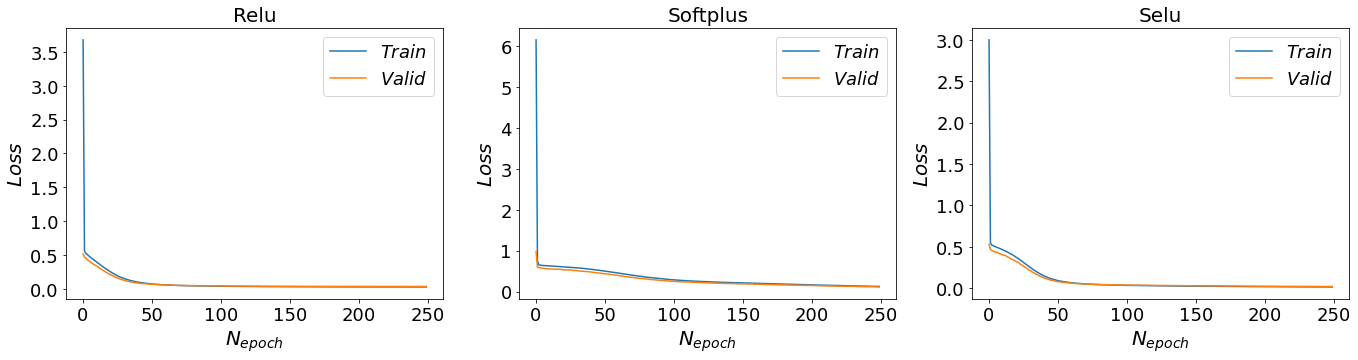

In [603]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history1_b.history['loss'])
plt.plot(history1_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Relu", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,2)

plt.plot(history1_b_soft.history['loss'])
plt.plot(history1_b_soft.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Softplus", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)

plt.subplot(1,3,3)

plt.plot(history1_b_selu.history['loss'])
plt.plot(history1_b_selu.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Selu", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)
plt.show()

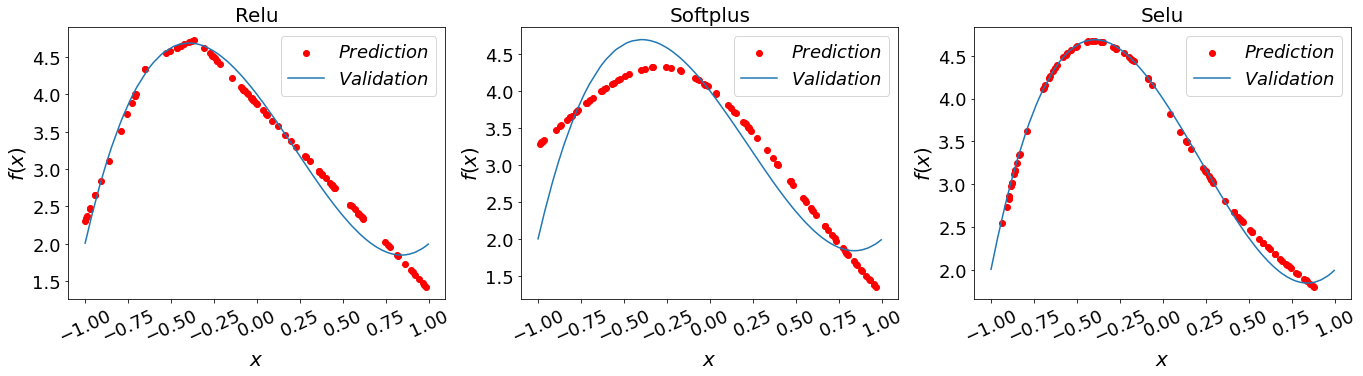

In [602]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Relu", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model1_b_soft.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Softplus", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model1_b_selu.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Selu", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [543]:
models = [ "Relu", "Softplus", "Selu"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score1bv[0], score1bv_soft[0], score1bv_selu[0]],
                 [score1bv[1], score1bv_soft[1], score1bv_selu[1]],
                 [score1bt[0], score1bt_soft[0], score1bt_selu[0]],
                 [score1bt[1], score1bt_soft[1], score1bt_selu[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Relu,Softplus,Selu
Loss V,0.034645,0.114747,0.020508
Accuracy V,0.034645,0.114747,0.020508
Loss VT,0.034645,0.114747,0.020508
Accuracy VT,0.034645,0.114747,0.020508


Dai risultati ottenuti vediamo che in questo caso la funzione di attivazione 'selu' migliora le prestazioni della rete.

Cambiamo ora il tipo di ottimizzatore, confrontiamo i risultati ottenuti con lo stochastic gradient descent rispetto a quelli ottenuti con l'ottimizzatore Adagrad e Adadelta.

In [553]:
# compose the NN model
model1_b_adg = tf.keras.Sequential()
model1_b_adg.add(Dense(8, input_shape=(1,), activation="relu"))
model1_b_adg.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_adg.compile(optimizer='adagrad', loss='mse', metrics=['mse'])

In [554]:
history1_b_adg = model1_b_adg.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [555]:
score1bv_adg = model1_b_adg.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_adg = model1_b_adg.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [556]:
# compose the NN model
model1_b_add = tf.keras.Sequential()
model1_b_add.add(Dense(8, input_shape=(1,), activation="relu"))
model1_b_add.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_add.compile(optimizer='adadelta', loss='mse', metrics=['mse'])

In [557]:
history1_b_add = model1_b_add.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [558]:
score1bv_add = model1_b_add.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_add = model1_b_add.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

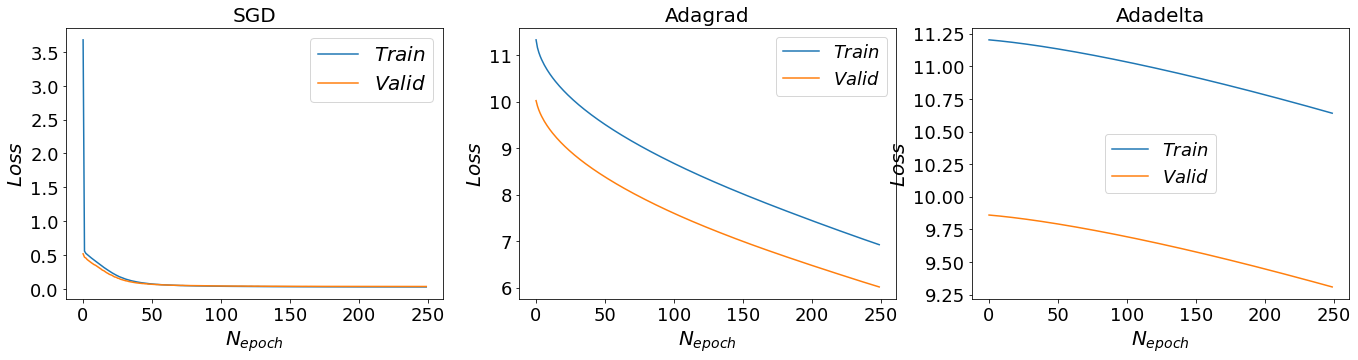

In [601]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history1_b.history['loss'])
plt.plot(history1_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("SGD", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=20)



plt.subplot(1,3,2)

plt.plot(history1_b_adg.history['loss'])
plt.plot(history1_b_adg.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Adagrad", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,3)

plt.plot(history1_b_add.history['loss'])
plt.plot(history1_b_add.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Adadelta", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='center', fontsize=18)
plt.show()

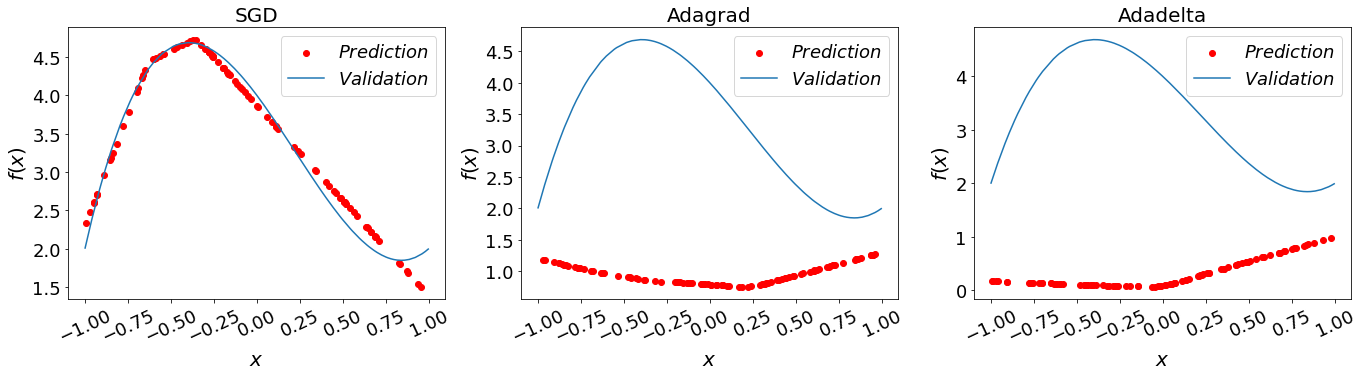

In [600]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("SGD", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model1_b_adg.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Adagrad", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model1_b_add.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Adadelta", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [561]:
models = [ "SGD", "Adagrad", "Adadelta"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score1bv[0], score1bv_adg[0], score1bv_add[0]],
                 [score1bv[1], score1bv_adg[1], score1bv_add[1]],
                 [score1bt[0], score1bt_adg[0], score1bt_add[0]],
                 [score1bt[1], score1bt_adg[1], score1bt_add[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,SGD,Adagrad,Adadelta
Loss V,0.034645,6.017487,9.308825
Accuracy V,0.034645,6.017487,9.308825
Loss VT,0.034645,6.017487,9.308825
Accuracy VT,0.034645,6.017487,9.308825


Dai risultati ottenuti il miglior ottimizzatore in questo caso risulta essere lo stochastic gradient descent.

Cambiamo ora le funzioni di loss, confrontiamo i risultati ottenuti utilizzando il mean square error rispetto a quelli ottenuti usando il mean absolute errore e il mean squared logarithmic error.

In [569]:
# compose the NN model
model1_b_mae = tf.keras.Sequential()
model1_b_mae.add(Dense(8, input_shape=(1,), activation="relu"))
model1_b_mae.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

In [570]:
history1_b_mae = model1_b_mae.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [571]:
score1bv_mae = model1_b_mae.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_mae = model1_b_mae.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [565]:
# compose the NN model
model1_b_msle = tf.keras.Sequential()
model1_b_msle.add(Dense(8, input_shape=(1,), activation="relu"))
model1_b_msle.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model1_b_msle.compile(optimizer='sgd', loss='msle', metrics=['mse'])

In [566]:
history1_b_msle = model1_b_msle.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [567]:
score1bv_msle = model1_b_msle.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score1bt_msle = model1_b_msle.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

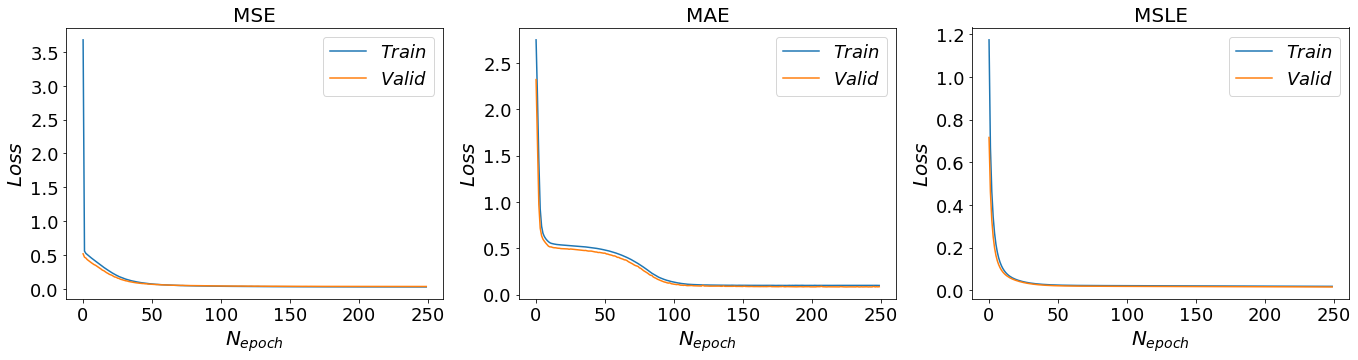

In [597]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history1_b.history['loss'])
plt.plot(history1_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,2)

plt.plot(history1_b_mae.history['loss'])
plt.plot(history1_b_mae.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MAE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,3)

plt.plot(history1_b_msle.history['loss'])
plt.plot(history1_b_msle.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSLE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)
plt.show()

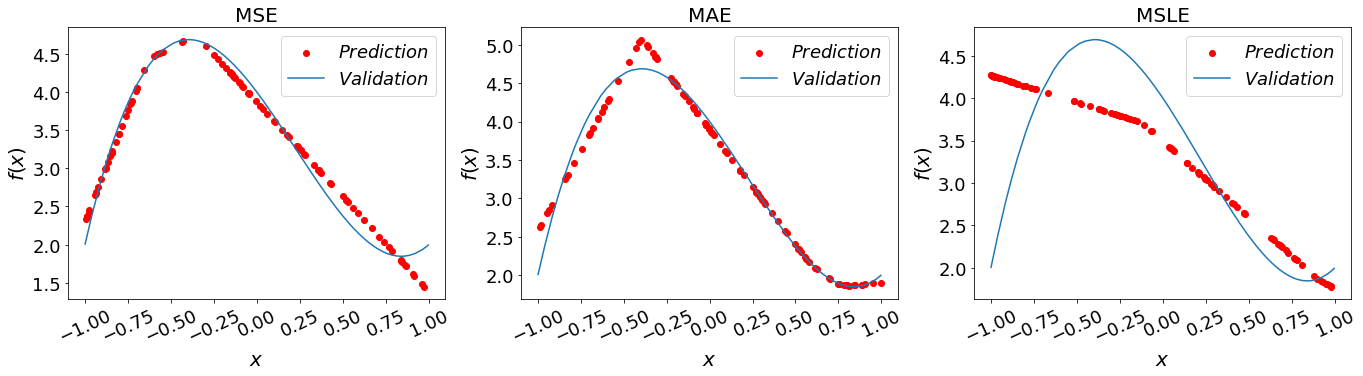

In [596]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model1_b_mae.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MAE", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model1_b_msle.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MSLE", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [575]:
models = [ "MSE", "MAE", "MSLE"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score1bv[0], score1bv_mae[0], score1bv_msle[0]],
                 [score1bv[1], score1bv_mae[1], score1bv_msle[1]],
                 [score1bt[0], score1bt_mae[0], score1bt_msle[0]],
                 [score1bt[1], score1bt_mae[1], score1bt_msle[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,MSE,MAE,MSLE
Loss V,0.034645,0.085398,0.016525
Accuracy V,0.034645,0.017634,0.335692
Loss VT,0.034645,0.085398,0.016525
Accuracy VT,0.034645,0.017634,0.335692


Dai risultati ottenuti vediamo che la miglior predizione è ottenuta usando come funzione di loss il mean square error. 

Dalle analisi fatte finora i risultati migliori sono stati ottenuti con il terzo modello usando la funzione di attivazione 'selu', applichiamo quindi questa rete ai dati di validazione esterni all'intervallo di train.

In [576]:
history1_b_selu_out = model1_b_selu.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1_ofr, y_valid1_ofr), verbose=0)

In [577]:
score1bv_selu_out = model1_b_selu.evaluate(x_valid1_ofr, y_valid1_ofr, batch_size=50, verbose=0)
score1bt_selu_out = model1_b_selu.evaluate(x_valid1_ofr, y_target1_ofr, batch_size=50, verbose=0)

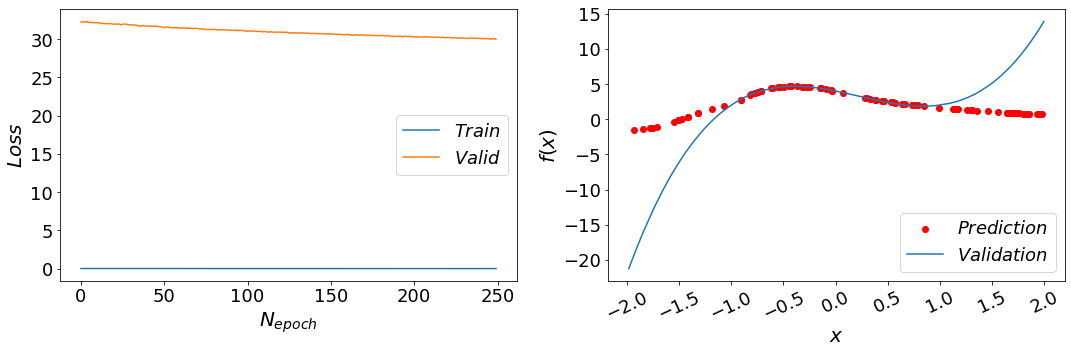

In [594]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)

plt.plot(history1_b_selu_out.history['loss'])
plt.plot(history1_b_selu_out.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,2,2)

x_predicted1_a = np.random.uniform(-2, 2, 100)
y_predicted1_a = model1_b_selu.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1_ofr, y_target1_ofr, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=18)

plt.show()

In [590]:
models = [ "Expanded validation data"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score1bv_selu_out[0]],
                 [score1bv_selu_out[1]],
                 [score1bt_selu_out[0]],
                 [score1bt_selu_out[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Expanded validation data
Loss V,29.981826
Accuracy V,29.981827
Loss VT,29.981826
Accuracy VT,29.981827


Dai valori delle funzioni di loss, dall'accuratezza del modello e dai grafici ottenuti vediamo che la rete non è in grado di fare delle predizioni attendibili su dati che hanno valori esterni rispetto all'intervallo dei dati di training.

#### Reti con tre layer

Consideriamo ora una rete formata tre layer con tre possibili strutture per la rete stessa:
- **Mod. 1**: primo layer formato da due neuroni, secondo layer formato da quattro neuroni, terzo layer formato da un neurone;
- **Mod. 2**: primo layer formato da quattro neuroni, secondo layer formato da otto neuroni, terzo layer formato da un neurone;
- **Mod. 3**: primo layer formato da otto neuroni, secondo layer formato da otto neuroni, terzo layer formato da un neurone.

In [616]:
# compose the NN model
model2 = tf.keras.Sequential()
model2.add(Dense(2, input_shape=(1,), activation="relu"))
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [617]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [618]:
score2v = model2.evaluate(x_valid1, y_valid1, batch_size=32, verbose=10)
score2t = model2.evaluate(x_valid1, y_target1, batch_size=32, verbose=10)

In [620]:
# compose the NN model
model2_a = tf.keras.Sequential()
model2_a.add(Dense(4, input_shape=(1,), activation="relu"))
model2_a.add(Dense(8, activation="relu"))
model2_a.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_a.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [621]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2_a = model2_a.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [622]:
score2av = model2_a.evaluate(x_valid1, y_valid1, batch_size=32, verbose=10)
score2at = model2_a.evaluate(x_valid1, y_target1, batch_size=32, verbose=10)

In [628]:
# compose the NN model
model2_b = tf.keras.Sequential()
model2_b.add(Dense(8, input_shape=(1,), activation="relu"))
model2_b.add(Dense(8, activation="relu"))
model2_b.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [629]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2_b = model2_b.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [630]:
score2bv = model2_b.evaluate(x_valid1, y_valid1, batch_size=32, verbose=10)
score2bt = model2_b.evaluate(x_valid1, y_target1, batch_size=32, verbose=10)

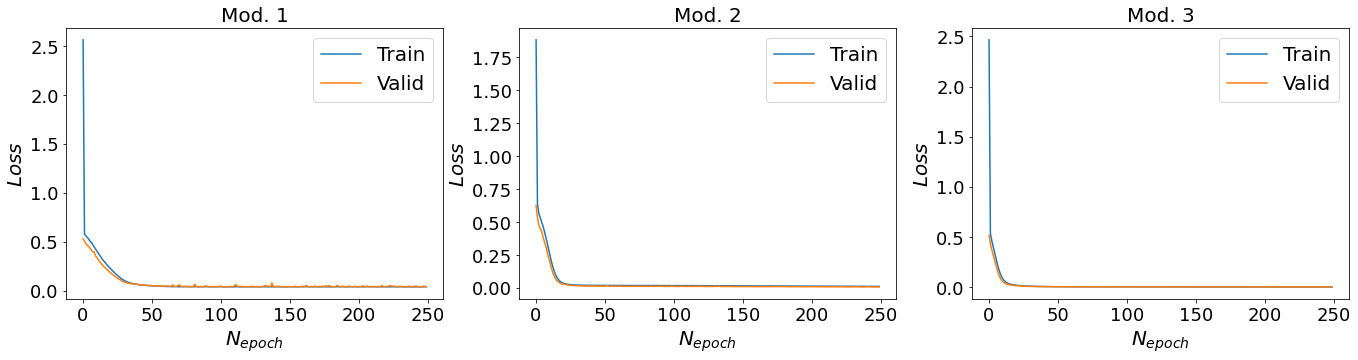

In [631]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 1", fontsize=20)
plt.legend(['Train', 'Valid'], loc='best', fontsize=20)



plt.subplot(1,3,2)

plt.plot(history2_a.history['loss'])
plt.plot(history2_a.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 2", fontsize=20)
plt.legend(['Train', 'Valid'], loc='best', fontsize=20)


plt.subplot(1,3,3)

plt.plot(history2_b.history['loss'])
plt.plot(history2_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Mod. 3", fontsize=20)
plt.legend(['Train', 'Valid'], loc='best', fontsize=20)


plt.show()

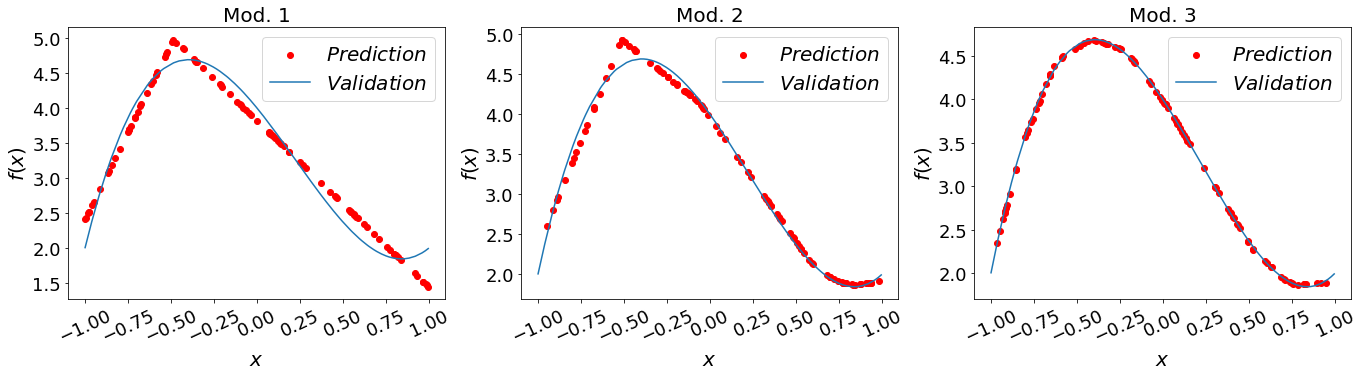

In [632]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 1", fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.subplot(1,3,2)

x_predicted2_a = np.random.uniform(-1, 1, 100)
y_predicted2_a = model2_a.predict(x_predicted2_a)
plt.scatter(x_predicted2_a, y_predicted2_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 2", fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.subplot(1,3,3)

x_predicted2_b = np.random.uniform(-1, 1, 100)
y_predicted2_b = model2_b.predict(x_predicted2_b)
plt.scatter(x_predicted2_b, y_predicted2_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Mod. 3", fontsize=20)
plt.legend(loc='best', fontsize=20)


plt.show()

In [387]:
models = [ "Mod. 1", "Mod.2", "Mod.3"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score2v[0], score2av[0], score2bv[0]],
                 [score2v[1], score2av[1], score2bv[1]],
                 [score2t[0], score2at[0], score2bt[0]],
                 [score2t[1], score2at[1], score2bt[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Mod. 1,Mod.2,Mod.3
Loss V,0.013857,0.035252,0.001066
Accuracy V,0.013857,0.035252,0.001066
Loss VT,0.013857,0.035252,0.001066
Accuracy VT,0.013857,0.035252,0.001066


Dai risultati vediamo che la rete che predice meglio i parametri del fit è quella che corrisponde al modello 3. In generale vediamo che anche in questo caso aumentando il numero di neuroni per layer migliorano le prestazioni della rete. 

Consideriamo ora in modello 3 e variamo le caratteristiche della rete come nel caso della rete a due layer.

Confrontiamo una rete che ha funzione di attivazione 'relu' con due reti aventi funzioni 'softplus' e 'selu'.

In [658]:
# compose the NN model
model2_b_soft = tf.keras.Sequential()
model2_b_soft.add(Dense(2, input_shape=(1,), activation="softplus"))
model2_b_soft.add(Dense(4, activation="softplus"))
model2_b_soft.add(Dense(1, activation="softplus"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_soft.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [659]:
history2_b_soft = model2_b_soft.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [660]:
score2bv_soft = model2_b_soft.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_soft = model2_b_soft.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [661]:
# compose the NN model
model2_b_selu = tf.keras.Sequential()
model2_b_selu.add(Dense(2, input_shape=(1,), activation="selu"))
model2_b_selu.add(Dense(4, activation="selu"))
model2_b_selu.add(Dense(1, activation="selu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_selu.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [662]:
history2_b_selu = model2_b_selu.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [663]:
score2bv_selu = model2_b_selu.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_selu = model2_b_selu.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

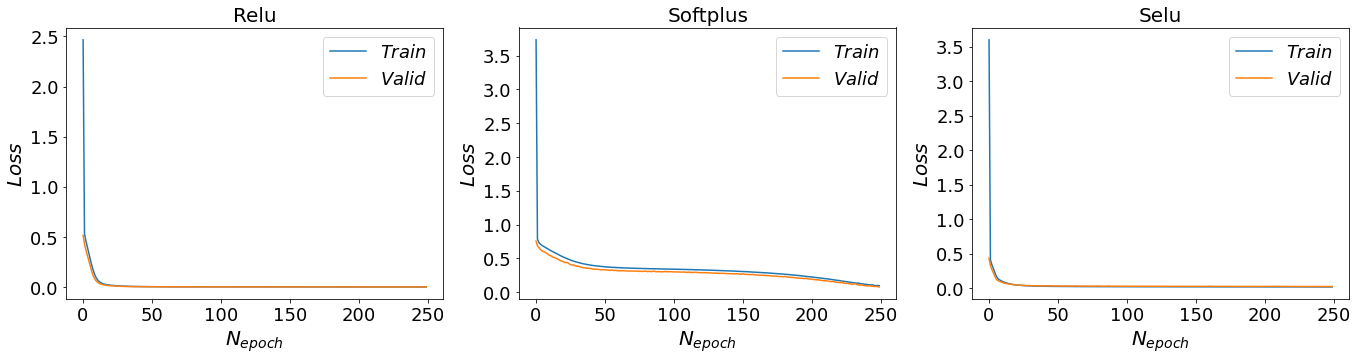

In [664]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history2_b.history['loss'])
plt.plot(history2_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Relu", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,2)

plt.plot(history2_b_soft.history['loss'])
plt.plot(history2_b_soft.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Softplus", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)

plt.subplot(1,3,3)

plt.plot(history2_b_selu.history['loss'])
plt.plot(history2_b_selu.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Selu", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)
plt.show()

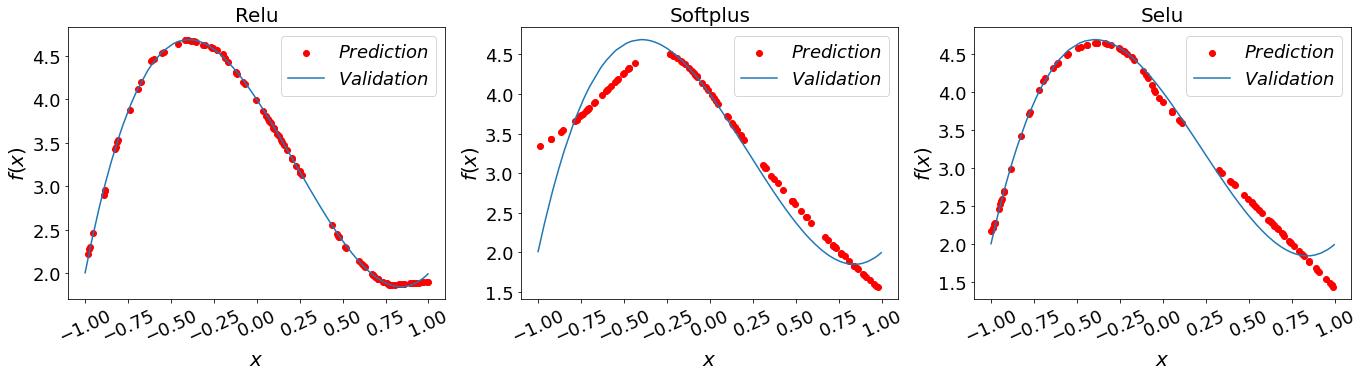

In [665]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model2_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Relu", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model2_b_soft.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Softplus", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model2_b_selu.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Selu", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [666]:
models = [ "Relu", "Softplus", "Selu"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score2bv[0], score2bv_soft[0], score2bv_selu[0]],
                 [score2bv[1], score2bv_soft[1], score2bv_selu[1]],
                 [score2bt[0], score2bt_soft[0], score2bt_selu[0]],
                 [score2bt[1], score2bt_soft[1], score2bt_selu[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Relu,Softplus,Selu
Loss V,0.000749,0.07532,0.024956
Accuracy V,0.000749,0.07532,0.024956
Loss VT,0.000749,0.07532,0.024956
Accuracy VT,0.000749,0.07532,0.024956


Dai dati ottenuti vediamo che la rete con previsioni migliori e minor valore di loss e accuratezza corrisponde a quella avende la 'relu' come funzione di attivazione.

In [677]:
# compose the NN model
model2_b_adg = tf.keras.Sequential()
model2_b_adg.add(Dense(8, input_shape=(1,), activation="relu"))
model2_b_adg.add(Dense(8, activation="relu"))
model2_b_adg.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_adg.compile(optimizer='adagrad', loss='mse', metrics=['mse'])

In [678]:
history2_b_adg = model2_b_adg.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

Confrontiamo ora tre reti aventi tre tipi di ottimizzatori diversi.

In [679]:
score2bv_adg = model2_b_adg.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_adg = model2_b_adg.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [695]:
# compose the NN model
model2_b_add = tf.keras.Sequential()
model2_b_add.add(Dense(8, input_shape=(1,), activation="relu"))
model2_b_add.add(Dense(8, activation="relu"))
model2_b_add.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_add.compile(optimizer='adadelta', loss='mse', metrics=['mse'])

In [696]:
history2_b_add = model2_b_add.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [697]:
score2bv_add = model2_b_add.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_add = model2_b_add.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

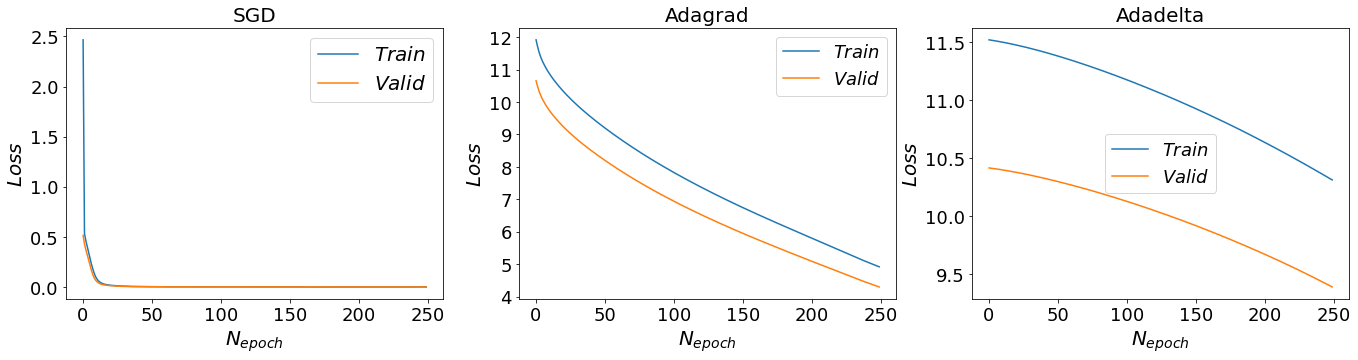

In [698]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history2_b.history['loss'])
plt.plot(history2_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("SGD", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=20)



plt.subplot(1,3,2)

plt.plot(history2_b_adg.history['loss'])
plt.plot(history2_b_adg.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Adagrad", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,3)

plt.plot(history2_b_add.history['loss'])
plt.plot(history2_b_add.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Adadelta", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='center', fontsize=18)
plt.show()

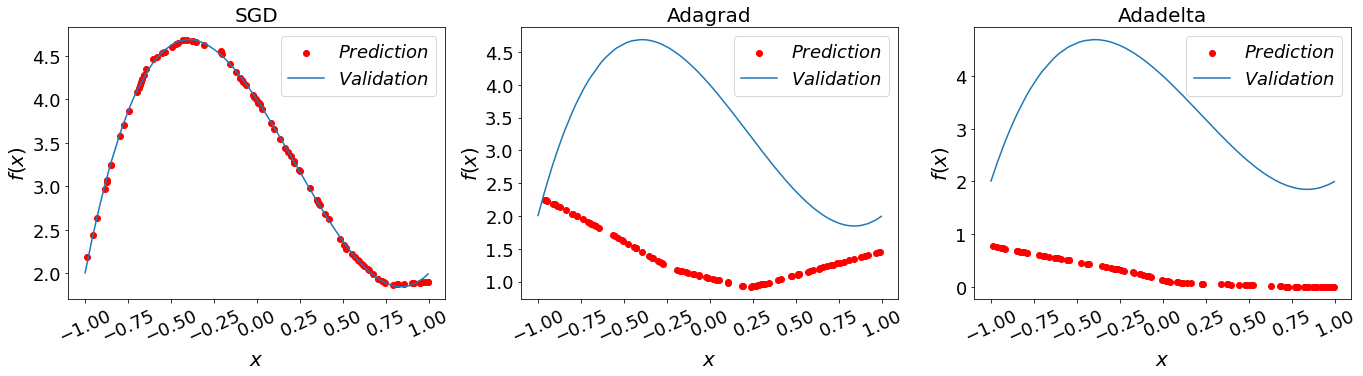

In [699]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model2_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("SGD", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model2_b_adg.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Adagrad", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model2_b_add.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("Adadelta", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [700]:
models = [ "SGD", "Adagrad", "Adadelta"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score2bv[0], score2bv_adg[0], score2bv_add[0]],
                 [score2bv[1], score2bv_adg[1], score2bv_add[1]],
                 [score2bt[0], score2bt_adg[0], score2bt_add[0]],
                 [score2bt[1], score2bt_adg[1], score2bt_add[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,SGD,Adagrad,Adadelta
Loss V,0.000749,4.296861,9.388907
Accuracy V,0.000749,4.296861,9.388907
Loss VT,0.000749,4.296861,9.388907
Accuracy VT,0.000749,4.296861,9.388907


Dai dati ottenuti vediamo che la rete che ottiene i risultati migliori è quella avente lo stochastic gradient descent come ottimizzatore.

In [686]:
# compose the NN model
model2_b_mae = tf.keras.Sequential()
model2_b_mae.add(Dense(8, input_shape=(1,), activation="relu"))
model2_b_mae.add(Dense(8, activation="relu"))
model2_b_mae.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_mae.compile(optimizer='sgd', loss='mae', metrics=['mse'])

In [ ]:
history2_b_mae = model2_b_mae.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

Confrontiamo infine tre reti aventi funzioni di loss diverse.

In [688]:
score2bv_mae = model2_b_mae.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_mae = model2_b_mae.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

In [701]:
# compose the NN model
model2_b_msle = tf.keras.Sequential()
model2_b_msle.add(Dense(8, input_shape=(1,), activation="relu"))
model2_b_msle.add(Dense(8, activation="relu"))
model2_b_msle.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model2_b_msle.compile(optimizer='sgd', loss='msle', metrics=['mse'])

In [702]:
history2_b_msle = model2_b_msle.fit(x=x_train1, y=y_train1, 
          batch_size=50, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1, y_valid1), verbose=0)

In [703]:
score2bv_msle = model2_b_msle.evaluate(x_valid1, y_valid1, batch_size=50, verbose=0)
score2bt_msle = model2_b_msle.evaluate(x_valid1, y_target1, batch_size=50, verbose=0)

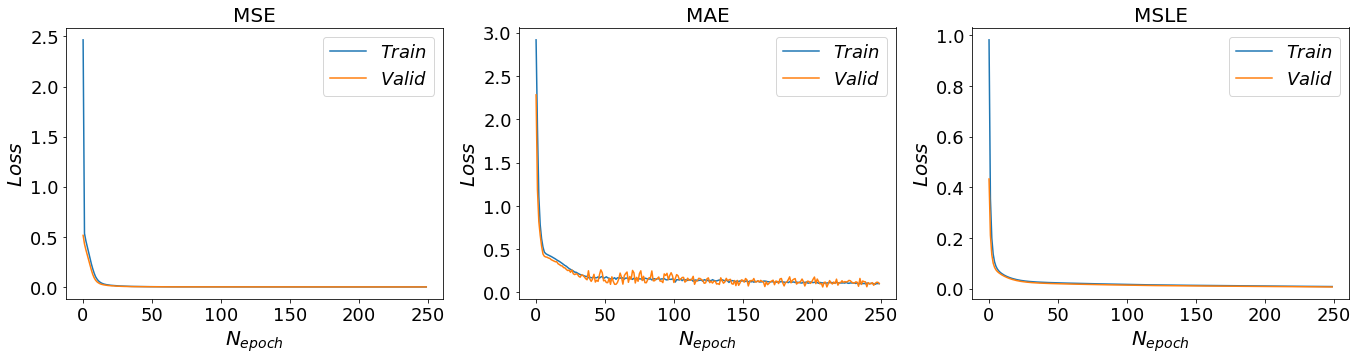

In [704]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)


plt.plot(history2_b.history['loss'])
plt.plot(history2_b.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,2)

plt.plot(history2_b_mae.history['loss'])
plt.plot(history2_b_mae.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MAE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,3,3)

plt.plot(history2_b_msle.history['loss'])
plt.plot(history2_b_msle.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSLE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)
plt.show()

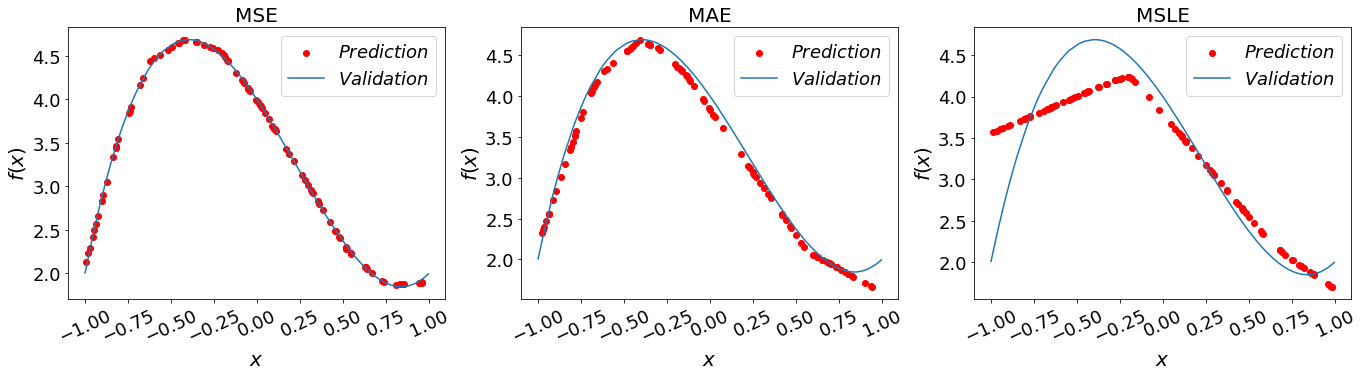

In [705]:
plt.figure(figsize=(23,5))

plt.subplot(1,3,1)

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model2_b.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,2)

x_predicted1_a = np.random.uniform(-1, 1, 100)
y_predicted1_a = model2_b_mae.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MAE", fontsize=20)
plt.legend(loc='best', fontsize=18)


plt.subplot(1,3,3)

x_predicted1_b = np.random.uniform(-1, 1, 100)
y_predicted1_b = model2_b_msle.predict(x_predicted1_b)
plt.scatter(x_predicted1_b, y_predicted1_b, label='$Prediction$', c='red')
plt.plot(x_valid1, y_target1, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.title("MSLE", fontsize=20)
plt.legend(loc='best', fontsize=18)

plt.show()

In [706]:
models = [ "MSE", "MAE", "MSLE"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score2bv[0], score2bv_mae[0], score2bv_msle[0]],
                 [score2bv[1], score2bv_mae[1], score2bv_msle[1]],
                 [score2bt[0], score2bt_mae[0], score2bt_msle[0]],
                 [score2bt[1], score2bt_mae[1], score2bt_msle[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,MSE,MAE,MSLE
Loss V,0.000749,0.101512,0.006967
Accuracy V,0.000749,0.015264,0.128942
Loss VT,0.000749,0.101512,0.006967
Accuracy VT,0.000749,0.015264,0.128942


Dai risultati ottenuti si evince che la rete con prestazioni migliori ha come funzione di loss il mean square error.

Utilizziamo dunque il modello 3 con funzione di attivazione 'relu', ottimizzatore 'SGD' e funzione di loss 'MSE' per analizzare dati di validazione che giacciono al di fuori dell'intervallo di training.

In [710]:
history2_b_ofr = model2_b.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=250,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid1_ofr, y_valid1_ofr), verbose=0)

In [711]:
score2bv_ofr = model2_b.evaluate(x_valid1_ofr, y_valid1_ofr, batch_size=32, verbose=10)
score2bt_ofr = model2_b.evaluate(x_valid1_ofr, y_target1_ofr, batch_size=32, verbose=10)

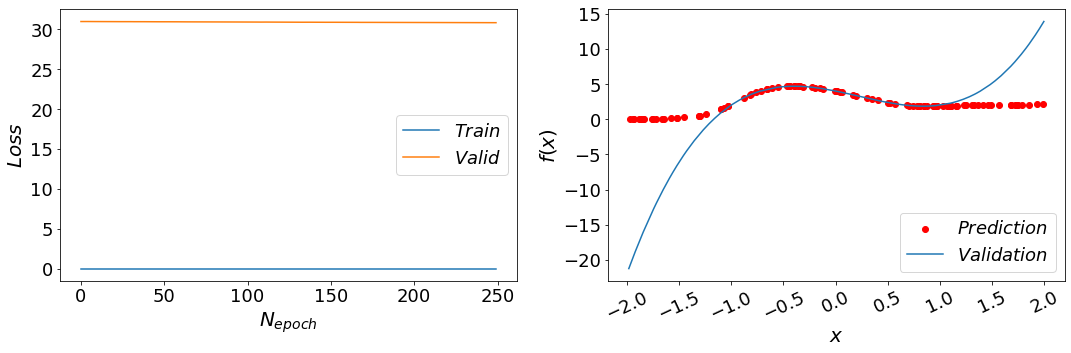

In [712]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)

plt.plot(history2_b_ofr.history['loss'])
plt.plot(history2_b_ofr.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)


plt.subplot(1,2,2)

x_predicted1_a = np.random.uniform(-2, 2, 100)
y_predicted1_a = model2_b.predict(x_predicted1_a)
plt.scatter(x_predicted1_a, y_predicted1_a, label='$Prediction$', c='red')
plt.plot(x_valid1_ofr, y_target1_ofr, label='$Validation$')
plt.xlabel("$x$", fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.xticks(fontsize=18, rotation=25)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=18)

plt.show()

In [713]:
models = [ "Expanded validation data"]
items = ["Loss V","Accuracy V","Loss VT","Accuracy VT"]
data = np.array([[score2bv_ofr[0]],
                 [score2bv_ofr[1]],
                 [score2bt_ofr[0]],
                 [score2bt_ofr[1]]])

df = pd.DataFrame(data, items, models)
display(df)

,Expanded validation data
Loss V,30.825343
Accuracy V,30.825346
Loss VT,30.825343
Accuracy VT,30.825346


Anche in questo caso vediamo che la rete non è in grado di fare delle buone previsioni su dati non appartenenti all'intervallo di training su cui la rete è stata allenata.

### Esercizio 11.3
  
Creiamo ora un modello di rete neurale per fittare una funzione trigonomentrica in due variabili $f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Prepariamo per prima cosa $2500$ punti $(x_{train}, y_{train})$ di training distribuiti uniformemente tra $[-3/2, 3/2]$ e $250$ punti $(x_{valid}, y_{valid})$ di validazione.

In [11]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 2500)
y_train = np.random.uniform(-3/2, 3/2, 2500)
X_train = np.zeros((x_train.size,2))
X_train[:,0]=x_train
X_train[:,1]=y_train

x_valid = np.random.uniform(-3/2, 3/2, 250)
y_valid = np.random.uniform(-3/2, 3/2, 250)
X_valid = np.zeros((x_valid.size,2))
X_valid[:,0]=x_valid
X_valid[:,1]=y_valid

# actual measures from which we want to guess regression parameters:
z_train = np.sin(x_train**2+y_train**2)
z_valid = np.sin(x_valid**2+y_valid**2)

Visualizziamo di seguito i dati di training e quindi la forma della funzione che la rete deve fittare.

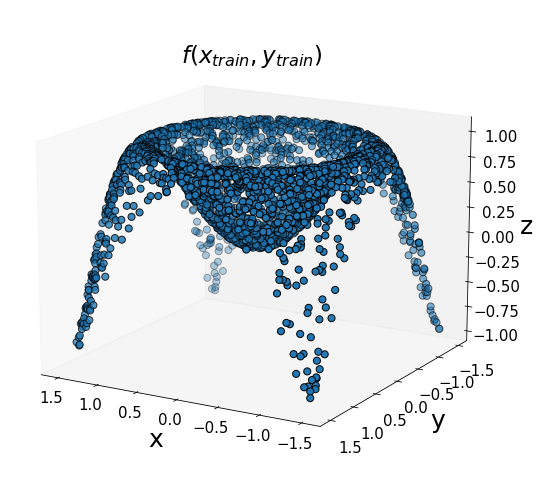

In [12]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_train, y_train, z_train, edgecolors='black', s=50)
ax.set_xlabel('x', fontsize=25, labelpad=10)
ax.set_ylabel('y', fontsize=25, labelpad=15)
ax.set_zlabel('z', fontsize=25, labelpad=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.tick_params(axis='x', which='major', pad=2)
ax.tick_params(axis='y', which='major', pad=9)
ax.tick_params(axis='z', which='major', pad=10)
ax.set_title('$f(x_{train},y_{train})$', y=0.95,  fontsize=23)
ax.view_init(15, 120)
ax.grid(False)

plt.show()

Sulla base delle prove fatte negli eserizi precedenti costruiamo una rete formata da un layer iniziale che prende in ingresso la coppia $(x_{train}, y_{train})$, due layer nascosti formati da $20$ neuroni ciascuno e un layer di output. Ogni layer utilizza la funzione di attivazione 'relu', l'ottimizatore della rete è lo stochastic gradient descent e la loss utilizza il mean square error. Stabiliamo un numero di epoche pari a $800$.

In [397]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="relu"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.summary()

In [398]:
history = model.fit(X_train, z_train, 
          batch_size=50, epochs=800,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_valid, z_valid), verbose=0)

In [399]:
#score_v = model.evaluate(X_valid, z_valid, batch_size=50, verbose=0)
#score_t = model.evaluate(X_valid, z_target, batch_size=50, verbose=0)
#print(score_t)
#print(score_v)

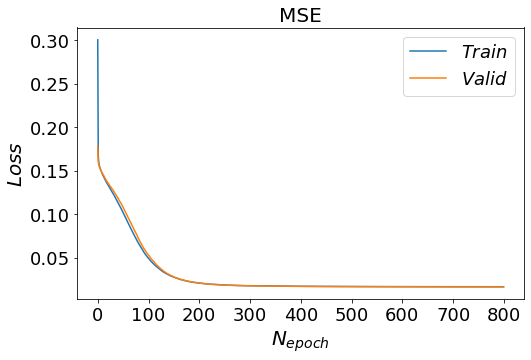

In [400]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)

plt.show()

In [401]:
x_predicted = np.random.uniform(-3/2, 3/2, 2000)
y_predicted = np.random.uniform(-3/2, 3/2, 2000)
X_predicted = np.zeros((x_predicted.size,2))
X_predicted[:,0] = x_predicted
X_predicted[:,1] = y_predicted
z_predicted = model.predict(X_predicted)

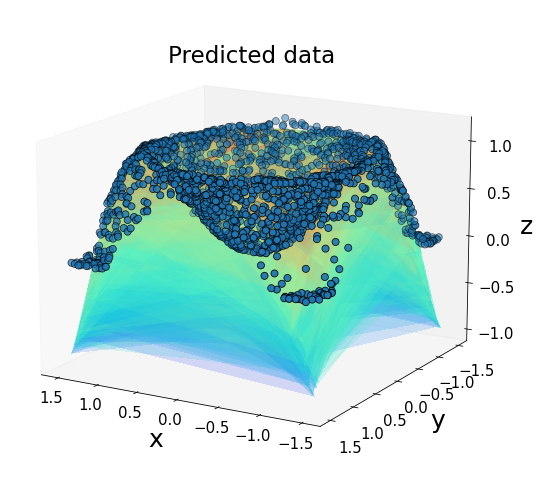

In [405]:
fig = plt.figure(figsize=[12, 9])
ax = fig.add_subplot(projection='3d')

X=x_valid
Y=y_valid
#ax.set_title('DNN Prediction', y=0.98, fontname='Bradley Hand', fontsize=25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X**2+Y**2)

ax.set_xlabel('x', fontsize=25, labelpad=10)
ax.set_ylabel('y', fontsize=25, labelpad=15)
ax.set_zlabel('z', fontsize=25, labelpad=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.tick_params(axis='x', which='major', pad=2)
ax.tick_params(axis='y', which='major', pad=9)
ax.tick_params(axis='z', which='major', pad=10)
ax.set_title('Predicted data', y=0.95,  fontsize=23)

surf = ax.plot_surface(X, Y, Z, cmap='rainbow', alpha=0.1, antialiased=False)
ax.scatter3D(x_predicted, y_predicted, z_predicted,  marker="o", s=50,
             edgecolor='black', linewidths=0.8)
ax.view_init(15, 120)
ax.grid(False)
plt.show()

Dai risultati ottenuti vediamo che la rete riesce a ricostruire abbastanza fedelmente la funzione considerata a meno delle code inferiori della funzione.

Dopo una serie di tentativi notiamo che mantenendo la stessa struttura della rete e settando la funzione di attivazione per il neurone di output a 'linear' la previsione della rete migliora visibilmente anche per i dati appartenenti alle code della funzione. Riportiamo di seguito i risultati ottenuti.

In [406]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="linear"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.summary()

In [407]:
history = model.fit(X_train, z_train, 
          batch_size=50, epochs=800,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_valid, z_valid), verbose=0)

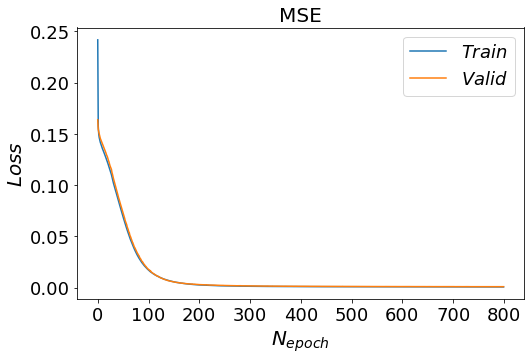

In [408]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('$Loss$', fontsize=20)
plt.xlabel('$N_{epoch}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("MSE", fontsize=20)
plt.legend(['$Train$', '$Valid$'], loc='best', fontsize=18)

plt.show()

In [409]:
x_predicted = np.random.uniform(-3/2, 3/2, 2000)
y_predicted = np.random.uniform(-3/2, 3/2, 2000)
X_predicted = np.zeros((x_predicted.size,2))
X_predicted[:,0] = x_predicted
X_predicted[:,1] = y_predicted
z_predicted = model.predict(X_predicted)

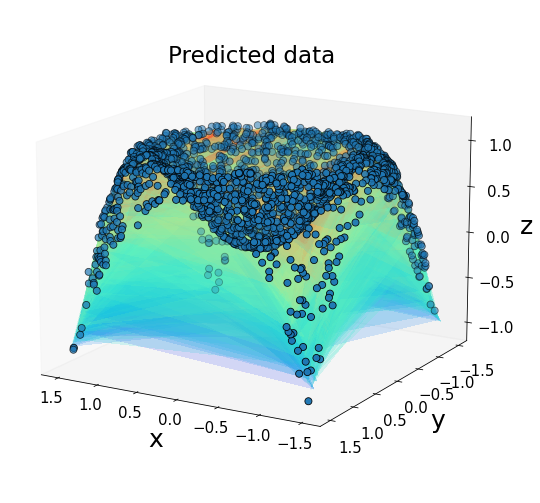

In [411]:
fig = plt.figure(figsize=[12, 9])
ax = fig.add_subplot(projection='3d')

X=x_valid
Y=y_valid
ax.set_title('Predicted data', y=0.95,  fontsize=23)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X**2+Y**2)

ax.set_xlabel('x', fontsize=25, labelpad=10)
ax.set_ylabel('y', fontsize=25, labelpad=15)
ax.set_zlabel('z', fontsize=25, labelpad=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.tick_params(axis='x', which='major', pad=2)
ax.tick_params(axis='y', which='major', pad=9)
ax.tick_params(axis='z', which='major', pad=10)


surf = ax.plot_surface(X, Y, Z, cmap='rainbow', alpha=0.1, antialiased=False)
ax.scatter3D(x_predicted, y_predicted, z_predicted,  marker="o", s=50,
             edgecolor='black', linewidths=0.8)
ax.view_init(15, 120)
ax.grid(False)
plt.show()